In [2]:
import numpy as np

x = [[1,3,2], [4,2,3]]
np.argmax(x, axis=0)

array([1, 0, 1])

In [ ]:
import numpy as np

A = np.matrix([[1,2,-1],[3,1,0]])
B = np.matrix([[-2,1],[0,-3],[2,1]])

print(A.dot(B))
print(A*B)

A = np.array([[1,2,-1],[3,1,0]])
B = np.array([[-2,1],[0,-3],[2,1]])

print(A.dot(B))
# print(A*B) //error
print(B.T)
print(A*B.T)

[[-4 -6]
 [-6  0]]
[[-4 -6]
 [-6  0]]
[[-4 -6]
 [-6  0]]
[[-2  0  2]
 [ 1 -3  1]]
[[-2  0 -2]
 [ 3 -3  0]]


In [22]:
import numpy as np

A = np.matrix([[1,2],[3,4]])
B = np.matrix([[5,6],[7,8]])

A.dot(B)
np.dot(A,B)
np.dot(B,A)
A.T

u = np.array ([1,2])
v = np.array ([3,4])
print(f" u = {u}, v = {v}")
print(f" u·v = {np.dot(u, v)}")

A = np.array([[1,2],[3,4]])
B = np.array([[5,6],[7,8]])
print(A.shape);print(B.shape)
inner = np.sum(A*B)
print(f"Frobenius inner product (A:B) = {inner}")

A = np.matrix([[1,2],[3,4]])
B = np.matrix([[5,6],[7,8]])
print(A.shape);print(B.shape)
inner = np.sum(A*B)
print(f"Frobenius inner product (A:B) = {inner}")

 u = [1 2], v = [3 4]
 u·v = 11
(2, 2)
(2, 2)
Frobenius inner product (A:B) = 70
(2, 2)
(2, 2)
Frobenius inner product (A:B) = 134


In [8]:
import numpy as np

A = np.matrix([[2,3],[1,4]])

shape = A.shape
if shape[0] != shape[1]:
    raise ValueError("정사각 행렬이 아니다.")

det = np.linalg.det(A)
if det == 0:
    raise ValueError("행렬식이 0이므로 역행렬이 존재하지 않습니다.")

A_inv = np.linalg.inv(A)
print(f"원본 행렬 A : {A}")
print(f"역행렬 A_inv : {A_inv}")

원본 행렬 A : [[2 3]
 [1 4]]
역행렬 A_inv : [[ 0.8 -0.6]
 [-0.2  0.4]]


In [26]:
# !pip install torch

import torch

#torch.tensor()는 함수(function)
#[[1.0], [2.0]]: 2×1 열 벡터 (Column vector)
#requires_grad=True: 이후 미분(gradient)을 계산할 수 있도록 자동 미분 트래킹 활성화
x = torch.tensor([[1.0], [2.0]], requires_grad=True)

#2×2 실수 행렬을 생성. 
#기본적으로 requires_grad=False이므로 A에 대해 미분은 계산되지 않음
A = torch.tensor([[1.0, 2.0], [2.0, 3.0]])

#torch.matmul()은 함수(function)
#torch.matmul(A, x) → Ax: 2×2 행렬과 2×1 벡터의 곱 → 결과는 2×1
#최종적으로 𝑥⊤𝐴𝑥를 계산 → 결과는 스칼라 (1×1 텐서)
f = torch.matmul(x.T, torch.matmul(A,x))
print(f"f matrix : {f}")

#backward()는 함수(function)
#f에 대해 미분값을 자동으로 계산하여, 
#f에 연결된 모든 requires_grad=True인 텐서들(x 등)에 대해 
#.grad 속성에 gradient 저장
# 수학적 의미는 f를 x에 대해 미분한 것이고, 그 미분값을 저장한 것이다.
f.backward()

#item()은 함수(function)
#1×1 텐서 (스칼라 텐서) f에서 파이썬 숫자 값(float)로 꺼내는 함수
print(f"f = {f.item()}")

#x.grad는 속성(attribute)
#f.backward() 실행 이후 x에 대해 계산된 미분 결과(gradient)를 저장한 텐서
print(f"∇ f:{x.grad}")

f matrix : tensor([[21.]], grad_fn=<MmBackward0>)
f = 21.0
∇ f:tensor([[10.],
        [16.]])


In [36]:
# !pip install tensorflow

import tensorflow as tf

# 변수 선언
x = tf.Variable([[1.0], [2.0]])
A = tf.constant([[1.0, 2.0], [2.0, 3.0]])

# 미분
with tf.GradientTape() as tape:
    f = tf.matmul(tf.transpose(x), tf.matmul(A, x))

grad = tape.gradient(f, x)

print("f =", f.numpy())
print("∇f =", grad.numpy())


f = [[21.]]
∇f = [[10.]
 [16.]]


In [35]:
from reportlab.pdfgen import canvas
from reportlab.pdfbase import pdfmetrics
from reportlab.pdfbase.ttfonts import TTFont
import os

# 1) Locate DejaVuSans.ttf that comes with matplotlib
import matplotlib
dejavu_path = os.path.join(matplotlib.get_data_path(), "fonts", "ttf", "DejaVuSans.ttf")

# 2) Register it under a friendly name
pdfmetrics.registerFont(TTFont("DejaVuSans", dejavu_path))

# 3) Your proof text (English, with math symbols)
proof_text = """Mathematical Proof and Intuitive Explanation:
Why ∂f/∂x = 2Ax for f = xᵗAx when A is symmetric (A = Aᵗ).

Function definition:
f(x) = xᵗ A x
x ∈ ℝⁿ : an n×1 column vector
A ∈ ℝⁿˣⁿ : a square matrix with A = Aᵗ

Goal:
Find ∂f/∂x.

[Method 1] Component-wise Expansion:
f = xᵗ A x = Σ(i=1 to n) Σ(j=1 to n) xᵢ Aᵢⱼ xⱼ

∂f/∂xₖ = Σ(j=1 to n) Aₖⱼ xⱼ + Σ(i=1 to n) Aᵢₖ xᵢ
       = (Ax)ₖ + (Aᵗx)ₖ

Therefore: ∂f/∂x = Ax + Aᵗx

[Symmetric Case]
If A = Aᵗ then ∂f/∂x = Ax + Ax = 2Ax.

[Method 2] Matrix-Differentiation Formula:
For f(x) = xᵗ A x,
∂f/∂x = 
  • 2Ax   if A = Aᵗ
  • Aᵗx + Ax   in the general case

[Intuitive Meaning]
f(x) = xᵗ A x is a quadratic form.
Geometrically, its gradient points in the 2Ax direction.

[Example: 2×2 Case]
A = [[1, 2],
     [2, 3]]
x = [x₁, x₂]ᵗ

f = x₁² + 4x₁x₂ + 3x₂²

∂f/∂x₁ = 2x₁ + 4x₂
∂f/∂x₂ = 4x₁ + 6x₂

Thus ∂f/∂x = [2x₁ + 4x₂, 4x₁ + 6x₂]ᵗ = 2Ax.
"""

# 4) Create the PDF
pdf_filename = "gradient_proof_dejavu.pdf"
c = canvas.Canvas(pdf_filename)
c.setFont("DejaVuSans", 11)

# Simple line-by-line drawing with line-wrap at ~80 chars
y = 800
for paragraph in proof_text.split("\n\n"):
    for line in paragraph.splitlines():
        c.drawString(40, y, line)
        y -= 14
        if y < 40:
            c.showPage()
            c.setFont("DejaVuSans", 11)
            y = 800
    y -= 10  # extra space between paragraphs

c.save()

print("PDF generated:", pdf_filename)


PDF generated: gradient_proof_dejavu.pdf


In [25]:
# !pip install tensorflow

import tensorflow as tf

# 변수 선언
x = tf.Variable([[1.0], [2.0]])
A = tf.constant([[1.0, 2.0], [2.0, 3.0]])

# 미분
with tf.GradientTape() as tape:
    f = tf.matmul(tf.transpose(x), tf.matmul(A, x))

grad = tape.gradient(f, x)

print("f =", f.numpy())
print("∇f =", grad.numpy())


f = [[21.]]
∇f = [[10.]
 [16.]]


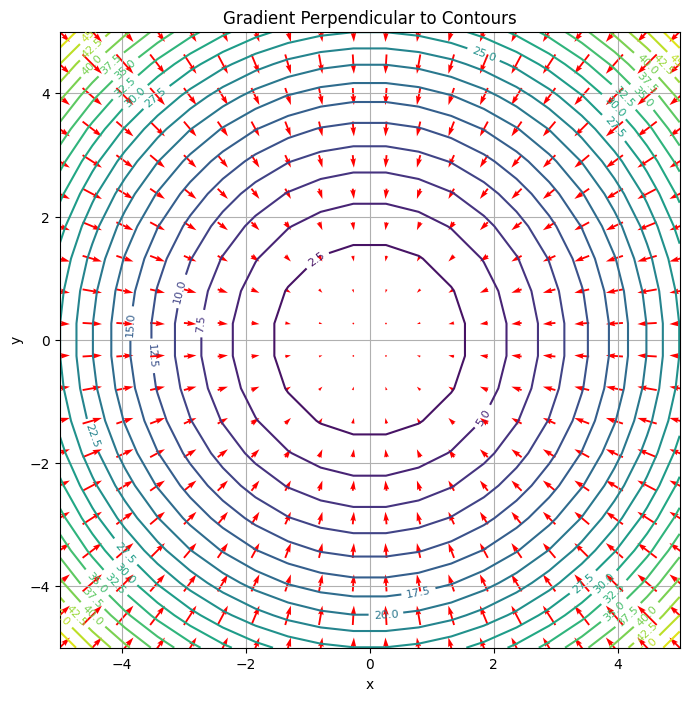

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5,5,20)
y = np.linspace(-5,5,20)
X, Y = np.meshgrid(x,y)

Z = X**2 + Y**2

dy, dx = np.gradient(Z, x, y)

plt.figure(figsize = (8,8))
contours = plt.contour(X, Y, Z, levels = 20, cmap = 'viridis')
plt.clabel(contours, inline = True, fontsize = 8)

plt.quiver(X, Y, -dx, -dy, color = 'red', pivot = 'mid')

plt.xlabel('x')
plt.ylabel('y')
plt.title("Gradient Perpendicular to Contours")
plt.grid(True)
plt.show()

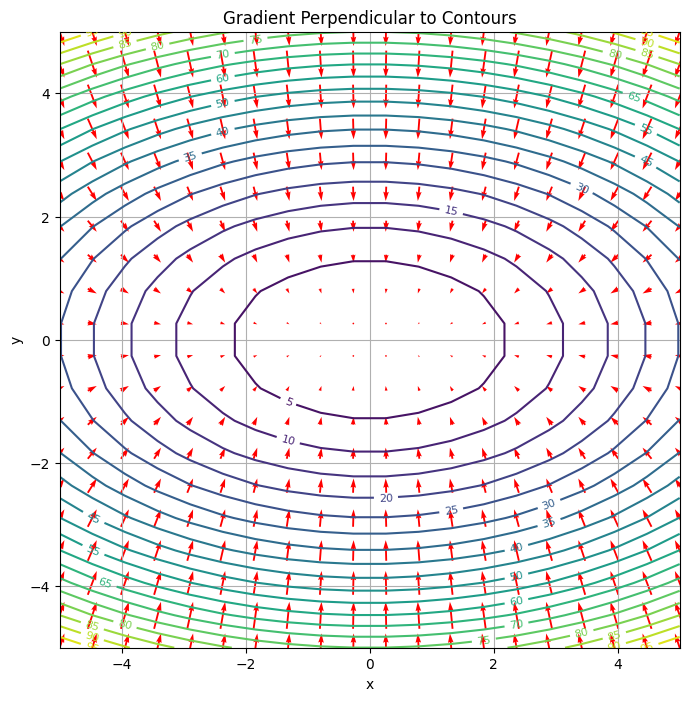

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5,5,20)
y = np.linspace(-5,5,20)
X, Y = np.meshgrid(x,y)

Z = X**2 + 3*Y**2

dy, dx = np.gradient(Z, x, y)

plt.figure(figsize = (8,8))
contours = plt.contour(X, Y, Z, levels = 20, cmap = 'viridis')
plt.clabel(contours, inline = True, fontsize = 8)

plt.quiver(X, Y, -dx, -dy, color = 'red', pivot = 'mid')

plt.xlabel('x')
plt.ylabel('y')
plt.title("Gradient Perpendicular to Contours")
plt.grid(True)
plt.show()

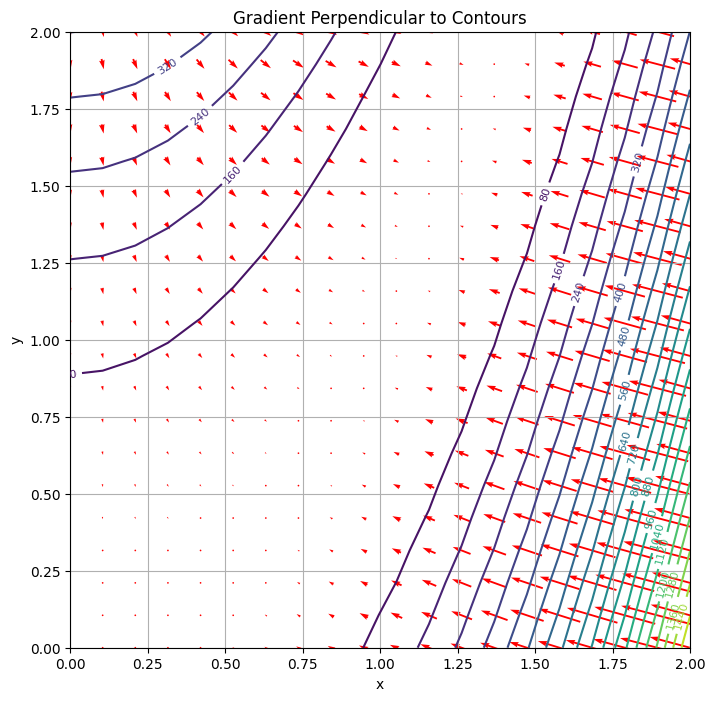

In [ ]:
import numpy as np # 수치 계산을 위한 파이썬 라이브러리
import matplotlib.pyplot as plt # 시각화를 위한 라이브러리

x = np.linspace(0, 2, 20) # [0, 2] 구간을 20개의 균일한 간격으로 나눈 값들을 생성 (1차원 배열)
y = np.linspace(0, 2, 20) 
X, Y = np.meshgrid(x,y) # 1차원 배열 x, y를 2차원 그리드 형태로 확장

# Rosenbrock 함수의 변형
# 최적화 함수로 자주 등장하며, x=y^2 부근에 골짜기가 존재함
Z = (1-X)**2 + 100 *(Y - X**2)**2 

# 2차원 배열 Z에 대해 x축 방향 기울기(dx), y축 방향 기울기(dy) 계산
# 중심차분 방식으로 근사 미분 수행
dy, dx = np.gradient(Z, x, y)

plt.figure(figsize = (8,8))
# 등고선(동일한 Z값을 가진 선들) 시각화
# 등고선 20단계
contours = plt.contour(X, Y, Z, levels = 20, cmap = 'viridis')
# 등고선 위에 Z값을 수치로 표시
# inline=True: 선 위에 숫자 겹치게
plt.clabel(contours, inline = True, fontsize = 8)

# 벡터 필드 시각화
# 여기서는 (-dx, -dy)를 그리므로 음의 그라디언트 방향 = 손실 함수가 감소하는 방향
# pivot='mid': 벡터의 중심을 기준으로 그린다는 뜻
plt.quiver(X, Y, -dx, -dy, color = 'red', pivot = 'mid')

plt.xlabel('x')
plt.ylabel('y')
plt.title("Gradient Perpendicular to Contours")
plt.grid(True)
plt.show()

# 등고선(Contouring): 함수 값이 일정한 곡선 (Z = constant)
# 화살표(Quiver): -∇Z 방향, 즉 함수값이 줄어드는 방향(경사하강법 방향)
# 직관: 경사하강법은 항상 등고선에 수직으로 이동합니다